# Task 1 (3 points)

Generate a toy dataset for the "XOR" problem:

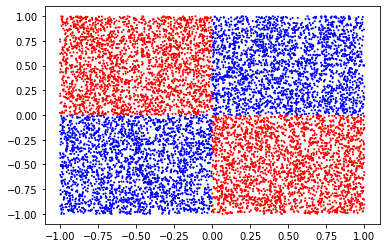

i.e. where the two features are distributed **uniformly** in $[-1, 1]$, and the target is $y = (x_0 >= 0) \text{ XOR } (x_1 >= 0)$.

Let the total number of points in the dataset be $N=10000$.

Fit a `sklearn.tree.DecisionTreeClassifier` on this data. Find a minimal `max_depth` value that results in train accuracy $>0.99$.

For each value of `max_depth` from 1 to the value found above, plot the data with the decision boundary for the obtained model. (*Hint: use `s=1` argument to `plt.scatter` to be able to see anything behind the data points.*)

For the model with train accuracy $>0.99$ use `sklearn.tree.plot_tree` to observe the tree structure.

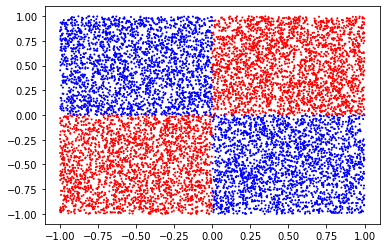

In [45]:
#Generating the dataset 
import numpy as np
import matplotlib
X1=np.random.uniform(-1,1,10000)
X2=np.random.uniform(-1,1,10000)
y = np.bitwise_xor(np.where(X1> 0, 1, 0), np.where(X2> 0, 1, 0)) 
colors = ['red','blue']
plt.scatter(X1, X2, c=y, s=1, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

In [61]:
# dealing the features as a dataframe
df = {'X1': X1, 'X2':X2}
df = pd.DataFrame(df)
df.head()

,X1,X2
0,-0.741811,0.268764
1,-0.558622,0.233199
2,-0.417631,0.119207
3,0.504182,-0.596876
4,-0.634244,-0.234356


In [83]:
#Function to plot the decision boundary 
from sklearn.metrics import accuracy_score

def plot_decision_surface(
                  clf, X, y,i,
                  nx=200, ny=100,
                  cmap='bwr',
                  alpha=0.6,
        ):
    """
    Plot the decision boundary of clf on X and y, visualize training points
    """
    
    # Define the grid
    x_top_left = X.min(axis=0) - 1
    x_bottom_right = X.max(axis=0) + 1
    grid_x0, grid_x1 = np.meshgrid(
         np.linspace(x_top_left[0], x_bottom_right[0], ny),
         np.linspace(x_top_left[1], x_bottom_right[1], nx)
      )
    
    # Calculate predictions on the grid
    y_pred_grid = clf.predict(
                        np.stack(
                              [
                                grid_x0.ravel(),
                                grid_x1.ravel()
                              ],
                              axis=1
                            )
                      ).reshape(grid_x1.shape)
    
    # Find optimal contour levels and make a filled
    # contour plot of predictions
    labels = np.sort(np.unique(y))
    labels = np.concatenate([[labels[0] - 1],
                             labels,
                             [labels[-1] + 1]])
    medians = (labels[1:] + labels[:-1]) / 2
    plt.contourf(grid_x0, grid_x1, y_pred_grid, cmap=cmap, alpha=alpha,
                 levels=medians)
    
    # Scatter data points on top of the plot,
    # with different styles for correct and wrong
    # predictions
    y_pred = clf.predict(X)
    plt.scatter(*X[y_pred==y].T, c=y[y_pred==y],
                marker='o', cmap=cmap, s=10, label='correct')
    plt.scatter(*X[y_pred!=y].T, c=y[y_pred!=y],
                marker='x', cmap=cmap, s=50, label='errors')

    # Dummy plot call to print the accuracy in the legend.
    plt.plot([], [], ' ',
             label='max depth= '+str(i)+' Accuracy = {:.3f}'.format(accuracy_score(y, y_pred)))
    
    plt.legend(loc='best')

Minimal max_depth value that results in train accuracy > 0.99 is: 4


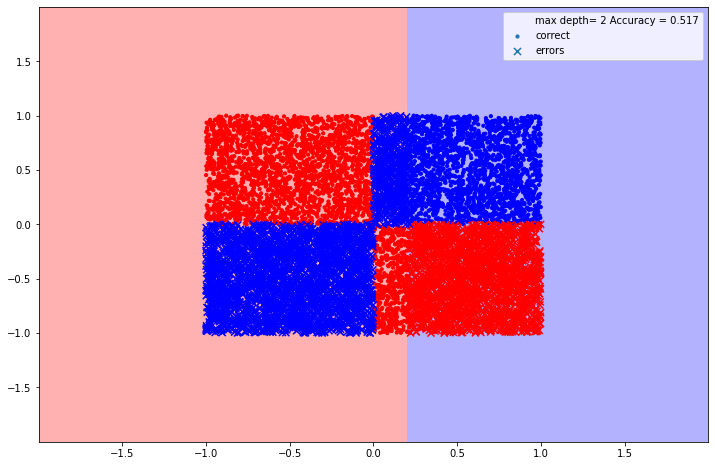

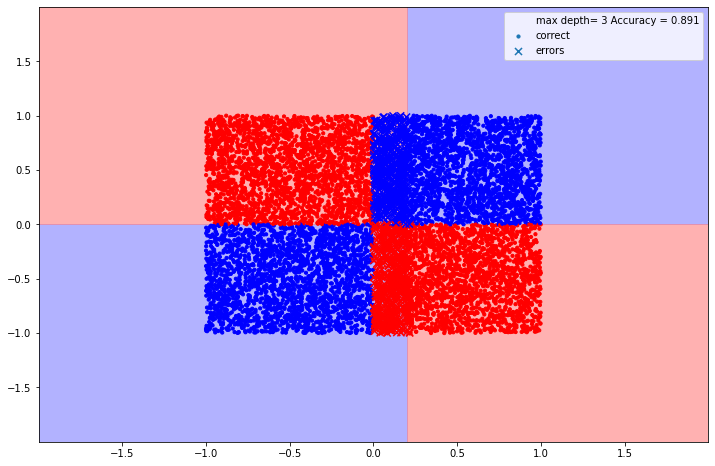

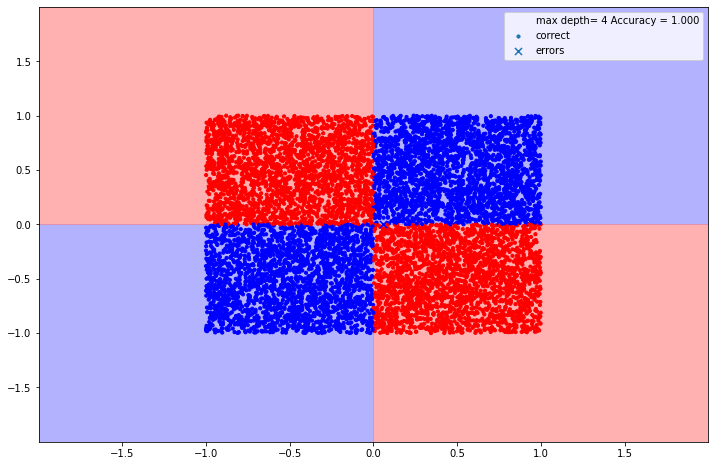

In [88]:
# Founding the minimal depth to acheive 99 % accuarcy 
# will take the whole data as training data 
from sklearn.tree import DecisionTreeClassifier
not_finished=True
i=1

while(not_finished):
    clf = DecisionTreeClassifier(max_depth=i)
    i=i+1
    clf.fit( np.array(df),y)
    plt.figure(figsize=(12, 8))
    plot_decision_surface(clf, np.array(df), y,i)
    if clf.score( np.array(df),y)>0.99:
      not_finished=False

print('Minimal max_depth value that results in train accuracy > 0.99 is: ' + str(i))


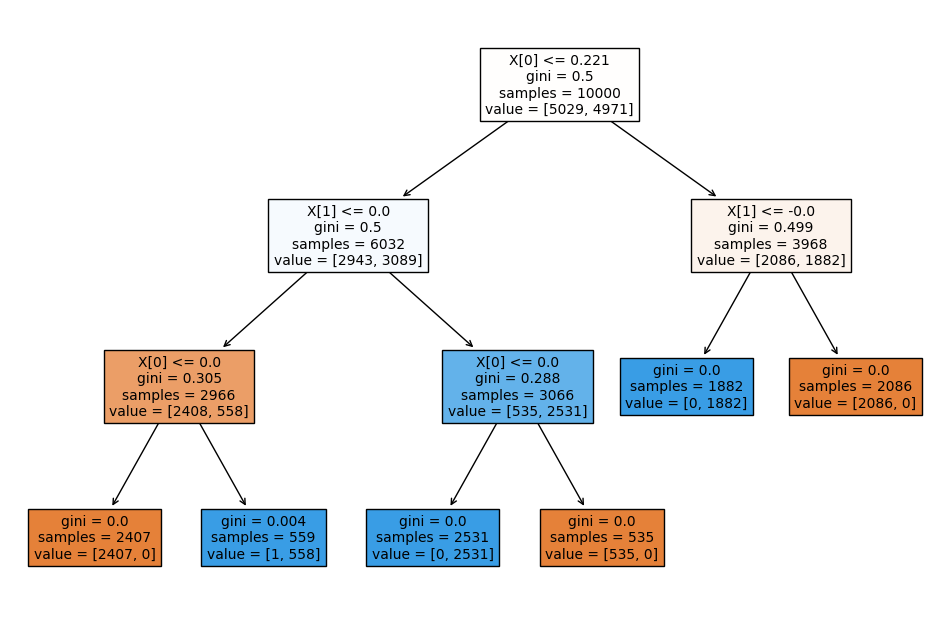

In [89]:
# Ploting the tree structure
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8), dpi=100)
plot_tree(clf,  fontsize=10, filled=True);

# Task 2 (3 points)

Consider the following dataset:

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)
print(X_train.iloc[:5])
print(y_train[:5])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Build a `sklearn.tree.DecisionTreeClassifier` to maximize the test ROC AUC score.

When predicting cancer, it's much more dangerous to have a false negative prediction rather than false positive. Try to find the best tree (in terms of test ROC AUC) where the labels are re-weighted with the `class_weight={'malignant' : 2., 'benign' : 1.}` argument provided to the `DecisionTreeClassifier` constructor.

Plot test ROC curves for the two best models you found on the same plot.

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,class_weight={'malignant' : 2., 'benign' : 1.})
clf.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0,
                       class_weight={'benign': 1.0, 'malignant': 2.0},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

In [144]:
#Encoding target label 
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
y_train=lb_make.fit_transform(y_train)
y_train

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [179]:
#imports
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt

In [180]:
# initializating the classifier 
clf = DecisionTreeClassifier(random_state=0,class_weight={1 : 2., 0 : 1.})

# defining the parameters 
param_grid = {
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20],
    "splitter":["best","random"],
    "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]
}

In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
searching_models=GridSearchCV(clf,param_grid=param_grid,scoring='roc_auc',cv=3,verbose=3)

In [192]:
# finding the best parameters 
searching_models.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV] max_depth=3, max_features=3, min_samples_leaf=1, splitter=best ..
[CV]  max_depth=3, max_features=3, min_samples_leaf=1, splitter=best, score=0.898, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=1, splitter=best ..
[CV]  max_depth=3, max_features=3, min_samples_leaf=1, splitter=best, score=0.956, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=1, splitter=best ..
[CV]  max_depth=3, max_features=3, min_samples_leaf=1, splitter=best, score=0.876, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  max_depth=3, max_features=3, min_samples_leaf=1, splitter=random, score=0.826, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  max_depth=3, max_features=3, min_samples_leaf=1, splitter=random, score=0.906, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  max_depth=3, max

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=3, max_features=3, min_samples_leaf=7, splitter=random, score=0.898, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=7, splitter=random 
[CV]  max_depth=3, max_features=3, min_samples_leaf=7, splitter=random, score=0.754, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=8, splitter=best ..
[CV]  max_depth=3, max_features=3, min_samples_leaf=8, splitter=best, score=0.942, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=8, splitter=best ..
[CV]  max_depth=3, max_features=3, min_samples_leaf=8, splitter=best, score=0.975, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=8, splitter=best ..
[CV]  max_depth=3, max_features=3, min_samples_leaf=8, splitter=best, score=0.927, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=8, splitter=random 
[CV]  max_depth=3, max_features=3, min_samples_leaf=8, splitter=random, score=0.689, total=   0.0s
[CV] max_depth=3, max_features=3, min_samples_leaf=8, spl

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:    5.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 1.0, 1: 2.0},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 15, 25],
               

In [193]:
# best hyperparameters 
searching_models.best_params_

{'max_depth': 5,
 'max_features': 20,
 'min_samples_leaf': 7,
 'splitter': 'random'}

In [194]:
# best roc_auc score

searching_models.best_score_

0.9722288100185422

In [206]:
# sort according to roc_auc score
import pandas as pd
results=pd.concat([pd.DataFrame(searching_models.cv_results_["params"]),pd.DataFrame(searching_models.cv_results_["mean_test_score"], columns=["roc_auc"])],axis=1)
results_sorted =results.sort_values(["roc_auc"], ascending=False)
results_sorted 

,max_depth,max_features,min_samples_leaf,splitter,roc_auc
153,5,20,7,random,0.972229
138,5,10,10,best,0.970629
298,25,10,10,best,0.970629
218,15,10,10,best,0.970629
136,5,10,9,best,0.969079
...,...,...,...,...,...
13,3,3,7,random,0.780558
11,3,3,6,random,0.780558
5,3,3,3,random,0.778649
9,3,3,5,random,0.769151


In [208]:
# encoding y_test labels
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
y_test=lb_make.fit_transform(y_test)

# Training with the best parameters 
Best_model= DecisionTreeClassifier( random_state=0,class_weight={1 : 2., 0 : 1.},max_depth=5,max_features=20,min_samples_leaf=7,splitter='random')
Best_model.fit(X_train,y_train)
y_predict=Best_model.predict_proba(X_test)

In [215]:
# roc auc on testing
malignant_probs = y_predict[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)
roc_auc 

0.9583333333333335

In [214]:
# Training with the second best parameters

Second_best_model= DecisionTreeClassifier( random_state=0,class_weight={1 : 2., 0 : 1.},max_depth=5,max_features=10,min_samples_leaf=10,splitter='best')
Second_best_model.fit(X_train,y_train)
y_predict2=Second_best_model.predict_proba(X_test)

# roc auc on testing
malignant_probs = y_predict2[:,1]
fpr2, tpr2, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr2, tpr2)
roc_auc 

0.9619565217391306

In [217]:
# function to plot ROc curve

def plot_roc_curve(fpr1, tpr1, fpr2, tpr2,label1,label2):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr1, tpr1, linewidth=2, label=label1),
    plt.plot(fpr2, tpr2, linewidth=2, label=label2),
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

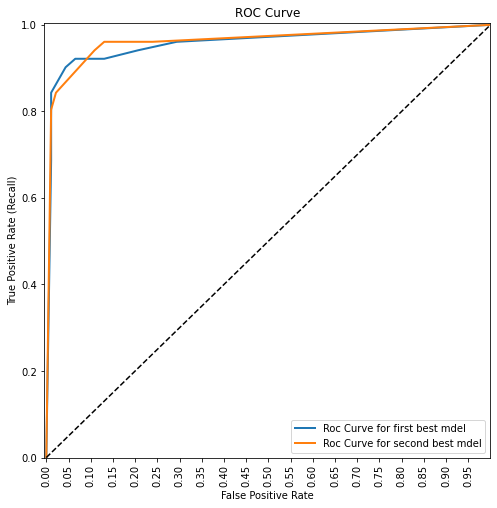

In [219]:
plot_roc_curve(fpr, tpr,fpr2, tpr2,'Roc Curve for first best model','Roc Curve for second best mdel')